In [1]:
import matplotlib.pyplot as plt
import numpy as np

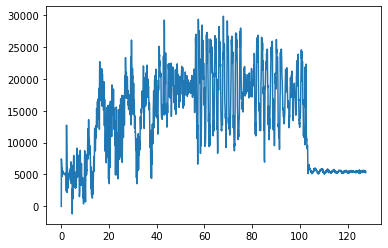

In [11]:
with open("record_moving.txt") as f:
    lines = [line.rstrip().split(",") for line in f]
arr = np.asarray(lines, dtype=np.float32)
x_axis = arr.T[2]

ts = 50e-3
N = len(x_axis)
t = np.linspace(0, ts * N, N)

plt.plot(t, x_axis)

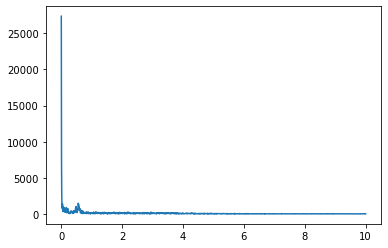

In [12]:
x_fft = np.fft.fft(x_axis)

f = np.linspace(0.0, 1.0/(2.0*ts), N//2)

plt.plot(f, 2.0/N * np.abs(x_fft[0:N//2]))


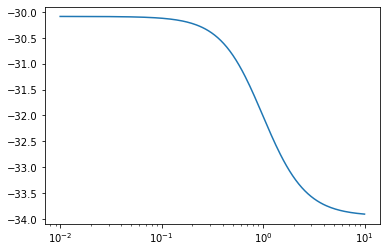

In [20]:
from scipy import signal

b, a = signal.butter(2, 1, 'lowpass', analog=False, output="ba", fs=1/ts)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.show()

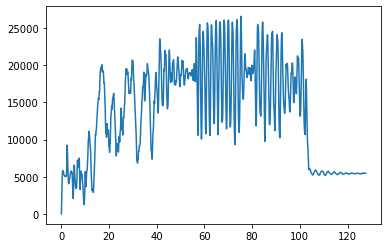

In [21]:
filtered = signal.lfilter(b, a, x_axis)
plt.plot(t, filtered)

In [17]:
print(a)
print(b)

[ 1.        -1.1429805  0.4128016]
[0.06745527 0.13491055 0.06745527]
